In [1]:
import numpy as np              ;   import pandas as pd
import geopandas as gpd         ;   from shapely.geometry import Polygon, Point, LineString
import shapely as sp            ;   import matplotlib.pyplot as plt
import time                     ;   import unidecode

In [2]:
startAll = time.time()
def tiempo():
    endAll = time.time() ; minutos = int(round(endAll - startAll)/60) ; segundos = int(round(endAll - startAll)-(int(round(endAll - startAll)/60))*60) ;     tiempo = 'tardo en ejecutar',minutos,'minutos ',segundos,'segundos' ;
    return tiempo

# PROPERATTI DATABASE

In [3]:
df = pd.read_csv('properatti.csv',sep=',',index_col=0)
df.shape

(121220, 25)

In [4]:
len(df.place_name.unique())

1061

In [5]:
len(df.property_type.unique())

4

# MISSING DATA

In [6]:
# vemos el total de nulos del dataset
df.isna().sum()[df.isna().sum()>0]

place_name                        23
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
description                        2
image_thumbnail                 3112
dtype: int64

In [7]:
# vemos que los faltantes de geolocalización no coinciden, asique hay esperanzas...
df.isna().sum()[df.isna().sum()>0][['geonames_id','lat-lon','lat','lon']]

geonames_id    18717
lat-lon        51550
lat            51550
lon            51550
dtype: int64

In [8]:
# vemos registros sin lat-long pero con geonames_id, recuperaremos ese lat-long
df[df['lat-lon'].isnull()][['geonames_id','lat-lon','lat','lon']].sample(10)

,geonames_id,lat-lon,lat,lon
25591,3436003.0,NaN,NaN,NaN
91047,3435607.0,NaN,NaN,NaN
118281,3860259.0,NaN,NaN,NaN
93750,3428983.0,NaN,NaN,NaN
96462,3427458.0,NaN,NaN,NaN
91248,3434130.0,NaN,NaN,NaN
106374,3838574.0,NaN,NaN,NaN
50391,3433955.0,NaN,NaN,NaN
11983,3435087.0,NaN,NaN,NaN
92383,3430863.0,NaN,NaN,NaN


In [16]:
names = ['geonameid','name','asciiname','alternatenames','latitude','longitude','feature_class','feature_code','country_code','cc2','admin1_code','admin2_code','admin3_code','admin4_code','population','elevation','dem','timezone','modification_date']

In [17]:
geoNames = pd.read_csv('geonames_id/AR/AR_copia.csv',error_bad_lines=False,sep=';',header=None,names=names)

In [19]:
geoNames.sample(3)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
9709,3832340,Monte de Yalán,Monte de Yalan,NaN,-28.68333,-61.85000,V,SCRB,AR,NaN,22.0,NaN,NaN,NaN,0,NaN,86,America/Argentina/Cordoba,1993-12-21
32260,3854978,Gobernador Mayer,Gobernador Mayer,NaN,-51.34835,-70.29135,P,PPL,AR,NaN,20.0,78021.0,NaN,NaN,0,NaN,104,America/Argentina/Rio_Gallegos,2016-01-30
16875,3839540,Arroyo Quinsicunoca,Arroyo Quinsicunoca,NaN,-39.40121,-70.23477,H,STMI,AR,NaN,15.0,NaN,NaN,NaN,0,NaN,1007,America/Argentina/Salta,2011-04-19


In [21]:
geoNames.loc[geoNames.geonameid == 3427458]

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
257,3427458,Villa Crespo,Villa Crespo,"Vilja Krespas,Villa Crespo,ビジャ・クレスポ",-34.60001,-58.44735,P,PPLX,AR,NaN,7.0,2015.0,NaN,NaN,0,NaN,16,America/Argentina/Buenos_Aires,2017-05-08


In [22]:
# diccionario para localizar geoNames
geo_dic = {geoNames.geonameid.iloc[i] : [geoNames.latitude.iloc[i] , geoNames.longitude.iloc[i]] for i in range(len(geoNames))}

In [27]:
# en todos los casos que no tenemos lat-lon no tenemos ni lat ni lon...
print(df.loc[df['lat-lon'].isnull()].lat.unique())
print(df.loc[df['lat-lon'].isnull()].lon.unique())

[nan]
[nan]


In [34]:
# en todos los casos que no tenemos lat ni lon no tenemos lat-lon...
print(df.loc[df['lat'].isnull()]['lat-lon'].unique())
print(df.loc[df['lon'].isnull()]['lat-lon'].unique())

[nan]
[nan]


### podemos pisar informacion tranquilos

In [46]:
df.lat.fillna(0,inplace=True)
df.lon.fillna(0,inplace=True)

In [55]:
for i in range(len(df)):
    try:
        if df.lat.iloc[i] == 0:
            df.lat.iloc[i] = geo_dic[df.geonames_id.iloc[i]][0]
            df.lon.iloc[i] = geo_dic[df.geonames_id.iloc[i]][1]
    except:
        pass

In [89]:
df.place_name.unique()

array(['Mataderos', 'La Plata', 'Liniers', ..., 'Laguna Paiva',
       'Malabrigo', 'Altos de Hudson I'], dtype=object)

In [57]:
# lat y long desaparecen de nuestro conteo de nulos.... EXITO!!!
df.isna().sum()[df.isna().sum()>0]

place_name                        23
geonames_id                    18717
lat-lon                        51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
description                        2
image_thumbnail                 3112
dtype: int64

# GEOLOCALIZACION

In [58]:
geodf = gpd.GeoDataFrame(df)

In [59]:
geodf = geodf.loc[geodf.lat.notna()]

In [60]:
geodf.reset_index(drop=True,inplace=True)

In [61]:
geodf['geometry'] = geodf.index.map(lambda x: Point(geodf.lon.iloc[x],geodf.lat.iloc[x]))

# MAPA Argentina

In [62]:
# ENCONTRE UN MAPA EMBEBIDO EN PANDAS, PERO NO COINCIDE 100%, NO LO USO
# mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# argentina = mundo.loc[mundo.name == 'Argentina']

In [63]:
# leo una cartografia de fondo
mapBase = gpd.read_file('Codgeo/pxdptodatosok.shp')

In [64]:
def acentos(data):
    try:         return data.replace('Ã³','ó').replace('Ã¡','á').replace('Ã­','í').replace('Ã©','e').replace('Ãº','ú')
    except:      pass

mapBase.departamen = mapBase.departamen.map(acentos)
mapBase.provincia = mapBase.provincia.map(acentos)
# quitamos la antartida
mapBase = mapBase.loc[(mapBase.departamen != 'Antártida Argentina')&(mapBase.departamen != 'Islas del Atlántico Sur')]

In [65]:
simple = mapBase[['codpcia','departamen','provincia','geometry']]
mas_simple = mapBase[['codpcia','provincia']]
lista_codigos = mas_simple.drop_duplicates()

In [66]:
dic_codigos = {lista_codigos.codpcia.iloc[i] : lista_codigos.provincia.iloc[i] for i in range(len(lista_codigos))}

In [67]:
a = dic_codigos['02']

In [68]:
a

'Ciudad Autónoma de Buenos Aires'

In [69]:
# recortamos las provincias
provincias = mapBase.dissolve('codpcia')
provincias = provincias.reindex(['pais','provincia','geometry'],axis=1)
provincias['pais'] = 'Agentina'
argentina = provincias.dissolve('pais')

#recortamos el mapa de buenos aires del total argentino
capitalMap = simple.loc[simple.codpcia == '02', :]
gbaMap = simple.loc[simple.codpcia == '06', :]
bsasMap = capitalMap.append(gbaMap, ignore_index=True)

#estandarizamos nuestros index y eliminamos las columnas q no usaremos
capital = capitalMap.reset_index()
gbaMap = gbaMap.reset_index()
bsasMap = bsasMap.reset_index()

### en primera instancia vemos algunos puntos fuera de argentina.

In [70]:
geodf.crs = argentina.crs

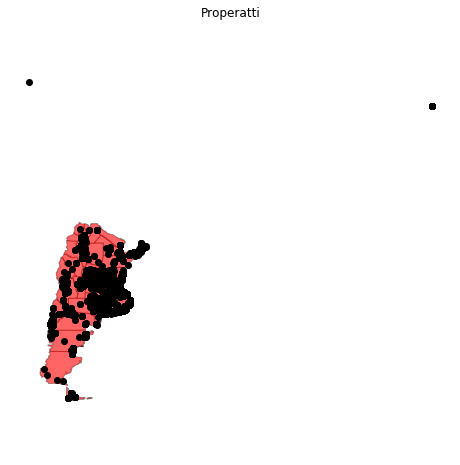

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

provincias.plot(ax=ax,alpha=0.4,color='white',edgecolor='black')
argentina.plot(ax=ax,alpha=0.6,color='red')
geodf.plot(ax=ax,color='black')

ax.set_axis_off()
plt.axis('equal')
ax.set_title('Properatti');

In [72]:
startAll = time.time()

coincidencia = gpd.sjoin(geodf,argentina,how='inner')

tiempo()

('tardo en ejecutar', 1, 'minutos ', 11, 'segundos')

In [73]:
len(coincidencia)

112806

In [74]:
print(len(geodf) - len(coincidencia),'puntos fuera de argentina.')

8414 puntos fuera de argentina.


In [75]:
geodf_OK = geodf.loc[coincidencia.index]

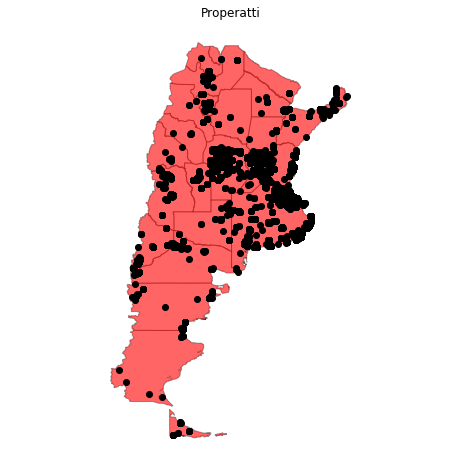

In [76]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

provincias.plot(ax=ax,alpha=0.4,color='white',edgecolor='black')
argentina.plot(ax=ax,alpha=0.6,color='red')
geodf_OK.plot(ax=ax,color='black')

ax.set_axis_off()
plt.axis('equal')
ax.set_title('Properatti');

In [77]:
# se pierde la mitad de la base...
print(df.shape[0] - geodf_OK.shape[0],'registros perdidos x falta de lat-long, o por no pertenecer a Argentina')

8414 registros perdidos x falta de lat-long


In [87]:
df.shape

(121220, 25)

In [79]:
df

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,-34.562700,-58.458290,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,-34.463120,-58.534810,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,0.000000,0.000000,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


In [80]:
len(df.place_name.unique())

1061

In [81]:
len(df.property_type.unique())

4

In [86]:
pd.get_dummies(df.property_type)

,PH,apartment,house,store
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
121215,0,1,0,0
121216,0,0,1,0
121217,0,1,0,0
121218,0,1,0,0
